In [1]:
'''
CMU 02-450, Spring 2022
'''
pass

In [2]:
'''
Imports
'''
import random

import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network 
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from common import *
from util import *

In [3]:
'''
Get data (regression)
'''

data_df = pd.read_csv(ML_INPUT_DATA_FILEPATH)
data_df.head(5)

,NSC #,BR:MCF7,BR:MDA-MB-231,BR:HS 578T,BR:BT-549,BR:T-47D,CNS:SF-268,CNS:SF-295,CNS:SF-539,CNS:SNB-19,...,drug_fingerprint_1012,drug_fingerprint_1013,drug_fingerprint_1014,drug_fingerprint_1015,drug_fingerprint_1016,drug_fingerprint_1017,drug_fingerprint_1018,drug_fingerprint_1019,drug_fingerprint_1020,drug_fingerprint_1021
0,0,4.816667,4.796667,4.683333,4.813333,5.400000,4.780000,4.530000,4.690000,4.293333,...,0,0,0,0,0,0,0,0,0,0
1,1,4.636667,4.505000,4.770000,6.516667,6.576667,5.363333,5.456667,6.153333,4.000000,...,0,0,0,0,0,0,0,0,0,0
2,2,NaN,NaN,NaN,NaN,NaN,4.233333,4.000000,4.236667,4.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,NaN,NaN,NaN,NaN,NaN,7.360000,6.850000,7.365000,7.010000,...,0,0,0,0,0,0,0,0,0,0
4,4,3.000000,3.500000,3.500000,3.000000,3.500000,3.500000,3.500000,3.500000,3.500000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_df = data_df.dropna()
data_df.head(5)

,NSC #,BR:MCF7,BR:MDA-MB-231,BR:HS 578T,BR:BT-549,BR:T-47D,CNS:SF-268,CNS:SF-295,CNS:SF-539,CNS:SNB-19,...,drug_fingerprint_1012,drug_fingerprint_1013,drug_fingerprint_1014,drug_fingerprint_1015,drug_fingerprint_1016,drug_fingerprint_1017,drug_fingerprint_1018,drug_fingerprint_1019,drug_fingerprint_1020,drug_fingerprint_1021
4,4,3.000000,3.500000,3.500000,3.000000,3.500000,3.500000,3.500000,3.500000,3.500000,...,0,0,0,0,0,0,0,0,0,0
11,11,7.381228,4.582059,3.986216,4.630000,4.681000,7.377317,7.407500,7.421138,6.230000,...,0,0,0,0,0,0,0,0,0,1
13,13,5.063333,6.203333,6.150000,6.650000,6.376667,6.617500,6.037500,6.645000,4.666667,...,0,0,0,0,0,0,0,0,0,0
14,14,6.155000,5.596667,5.214000,5.532857,5.695152,5.960083,5.967647,5.980083,4.110333,...,0,0,0,0,0,0,0,0,0,0
15,15,5.776226,4.593226,4.845625,4.006364,5.450000,5.385841,5.235726,5.603390,3.898448,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_df = data_df.sample(frac=1, random_state=450).reset_index(drop=True)
data_df.head(5)

,NSC #,BR:MCF7,BR:MDA-MB-231,BR:HS 578T,BR:BT-549,BR:T-47D,CNS:SF-268,CNS:SF-295,CNS:SF-539,CNS:SNB-19,...,drug_fingerprint_1012,drug_fingerprint_1013,drug_fingerprint_1014,drug_fingerprint_1015,drug_fingerprint_1016,drug_fingerprint_1017,drug_fingerprint_1018,drug_fingerprint_1019,drug_fingerprint_1020,drug_fingerprint_1021
0,3602,8.000,7.880000,6.68,5.140,7.440,6.667500,8.000000,6.240000,5.860,...,0,0,0,0,0,0,0,0,0,0
1,12434,4.480,4.593333,4.69,5.005,4.560,4.696667,4.643333,4.746667,4.620,...,0,0,0,1,0,0,0,0,0,0
2,1437,1.775,0.880000,0.18,1.025,1.255,1.475000,1.430000,1.200000,1.410,...,0,0,0,0,0,0,0,0,0,0
3,4020,5.900,4.810000,4.81,4.850,5.690,4.805000,4.770000,5.220000,4.800,...,0,0,0,0,0,0,0,0,0,0
4,4783,7.530,7.300000,7.28,5.805,5.500,7.393333,7.957500,7.745000,7.395,...,0,0,0,0,0,0,0,1,0,0


In [6]:
'''
Extract X (features) and y (labels) from dataset as numpy arrays.
X will be of dimensions N x F, where N is the number of samples/datapoints, and F is the number of features.
y will be of dimension N, where N is the number of samples/datapoints.
'''

feature_column_names = [str(col) for col in data_df.columns if str(col).startswith("drug_fingerprint")] # features are drug_fingerprints_X, for X from 1 to 1021
output_column_name = "BR:MCF7" # Just using the GI50 on the alphabetically-first cell type, for now.

X = data_df[feature_column_names].to_numpy()
y = data_df[output_column_name].to_numpy()


# TEMPORARY THING TO REDUCE DATA SIZE FOR CODE FUNCTIONALITY TESTING
#'''
X = X
y = y
#'''


print(X.shape)
# print(X[0:5, :])
print(y.shape)
# print(y[0:5])

(3556, 1021)
(3556,)


In [7]:
#Scale Data (if required)
scaledX = StandardScaler().fit_transform(X)

In [8]:
#Perform Variance Feature Selection
selectX = VarianceThreshold(threshold=(.8 * (1 - .8))).fit_transform(X)
print(selectX.shape)

(3556, 146)


In [9]:
#Perform Pairwise Correlation Feature Selection
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

reducedX = X
pairwise_features = sklearn.metrics.pairwise_distances(X.transpose(), metric='jaccard')
while (reducedX.shape[1] > 100):
    maxpair = np.unravel_index(pairwise_features.argmax(), pairwise_features.shape)
    removedindex = np.random.choice(maxpair)
    reducedX = np.delete(reducedX, removedindex, 1)
    pairwise_features = np.delete(pairwise_features, removedindex, 0)
    pairwise_features = np.delete(pairwise_features, removedindex, 1)

print(reducedX.shape)

(3556, 100)


In [10]:
# Modify Simulation Parameters
AL_RANDOM_SEEDS = [7*x for x in range(10)]
N_START_OBSERVATIONS = 10
OBSERVATIONS_LIMIT = 50
BASE_LEARNER_CLASS_LR = sklearn.linear_model.LinearRegression
BASE_LEARNER_CLASS_GBR = sklearn.ensemble.GradientBoostingRegressor
BASE_LEARNER_CLASS_SVR = sklearn.svm.SVR
BASE_LEARNER_CLASS_MLPR = sklearn.neural_network.MLPRegressor
BASE_LEARNER_CLASS_RFR = sklearn.ensemble.RandomForestRegressor

In [11]:
pairwise_distances = sklearn.metrics.pairwise_distances(X, metric='jaccard')

In [35]:
'''
Run linear regression simulation 10 times for each simulation type, and store the results.
'''
# Convenience to avoid having to specify parameters to the ActiveLearningSimulation constructor which will generally be the same every time here.
# Linear Regression Helper
class ActiveLearningSimulationHelperLR(ActiveLearningSimulation):
    def __init__(self, X, y, query_selector):
        super().__init__(
            X,
            y,
            n_start_observations=N_START_OBSERVATIONS,
            observed_set_size_limit=OBSERVATIONS_LIMIT,
            base_learner_class=sklearn.linear_model.LinearRegression,
            query_selector=query_selector)

print("Starting simulations.")

random_query_selector = RandomQuerySelector()
random_simulation = ActiveLearningSimulationHelperLR(X, y, random_query_selector)
random_output_dictsLR = random_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Random simulation.")

uncertainty_query_selector = UncertaintySamplingQuerySelector()
uncertainty_simulation = ActiveLearningSimulationHelperLR(X, y, uncertainty_query_selector)
uncertainty_output_dictsLR = uncertainty_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling simulation.")

uncertainty_with_density_query_selector = UncertaintySamplingWithDensityQuerySelector(pairwise_distances)
uncertainty_with_density_simulation = ActiveLearningSimulationHelperLR(X, y, uncertainty_with_density_query_selector)
uncertainty_with_density_output_dictsLR = uncertainty_with_density_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling With Density simulation.")

QBC_query_selector = QueryByCommitteeQuerySelector(BASE_LEARNER_CLASS_LR, bootstrap_sample_size_multiplier=1, bootstrap_model_count=10)
QBC_simulation = ActiveLearningSimulationHelperLR(X, y, QBC_query_selector)
QBC_output_dictsLR = QBC_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Query By Committee simulation.")


Starting simulations.


KeyboardInterrupt: 

In [ ]:
'''
TODO: If the active learning simulations take a while to run with the full data,
then add code here to store the results to a file (could just pickle the output dicts as an easy method).
This would save the time of having to regenerate the results in-between work sessions and/or to make new plots and such.
'''
pass

In [ ]:
'''
Generate plot from the simulation results just obtained.
'''

random_info_dictLR = {
    "simulation_type": "Random Sampling",
    "output_dicts": random_output_dictsLR,
    "color": "red"
}
uncertainty_info_dictLR = {
    "simulation_type": "Uncertainty Sampling",
    "output_dicts": uncertainty_output_dictsLR,
    "color": "green"
}
uncertainty_with_density_info_dictLR = {
    "simulation_type": "Uncertainty Sampling with Density",
    "output_dicts": uncertainty_with_density_output_dictsLR,
    "color": "blue"
}
QBC_info_dictLR = {
    "simulation_type": "Query by Committee",
    "output_dicts": QBC_output_dictsLR,
    "color": "purple"
}

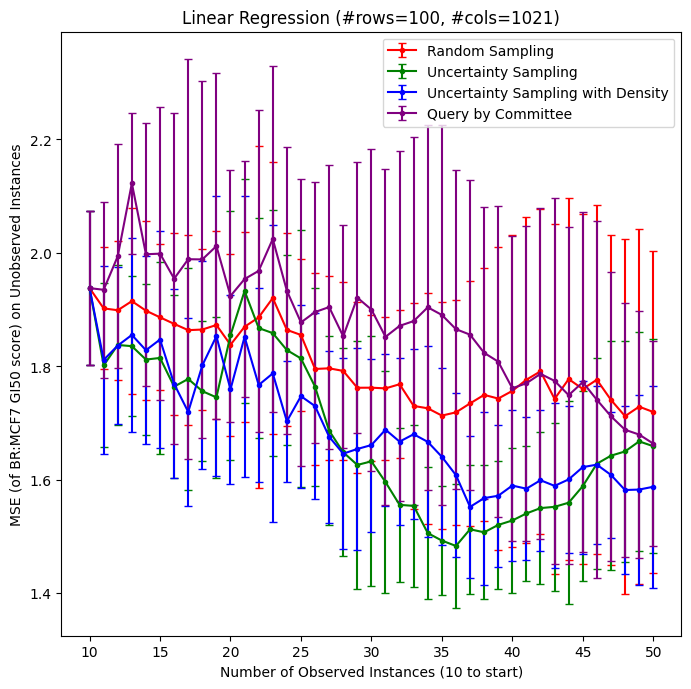

In [12]:
plt.figure(figsize=(8, 8), dpi=100)
for info_dict in [random_info_dictLR, uncertainty_info_dictLR, uncertainty_with_density_info_dictLR, QBC_info_dictLR]:
    output_dicts = info_dict["output_dicts"]
    all_unobserved_accs = np.array([d["unobserved_MSEs"] for d in output_dicts])
    mean_unobserved_accs = np.mean(all_unobserved_accs, axis=0)
    std_unobserved_accs = np.std(all_unobserved_accs, axis=0)

    n_rounds = mean_unobserved_accs.shape[0]

    round_numbers = np.array(range(n_rounds)) + N_START_OBSERVATIONS

    plt.errorbar(
        round_numbers, 
        mean_unobserved_accs,
        yerr=std_unobserved_accs,
        c=info_dict["color"],
        capsize=3,
        linestyle="-",
        marker=".",
        label=info_dict["simulation_type"]
    )
# plt.ylim((1, 2.5))
plt.legend(loc="upper right")
plt.xlabel("Number of Observed Instances ({} to start)".format(N_START_OBSERVATIONS))
plt.ylabel("MSE (of {} GI50 score) on Unobserved Instances".format(output_column_name))
plt.title("Linear Regression (#rows={}, #cols={})".format(X.shape[0], X.shape[1]))
plt.show()

In [12]:
'''
Run gradient boosting regression simulation 10 times for each simulation type, and store the results.
'''
# Convenience to avoid having to specify parameters to the ActiveLearningSimulation constructor which will generally be the same every time here.
# Gradient Boosting Regression Helper
class ActiveLearningSimulationHelperGBR(ActiveLearningSimulation):
    def __init__(self, X, y, query_selector):
        super().__init__(
            X,
            y,
            n_start_observations=N_START_OBSERVATIONS,
            observed_set_size_limit=OBSERVATIONS_LIMIT,
            base_learner_class=sklearn.ensemble.GradientBoostingRegressor,
            query_selector=query_selector)

print("Starting simulations.")

random_query_selector = RandomQuerySelector()
random_simulation = ActiveLearningSimulationHelperGBR(reducedX, y, random_query_selector)
random_output_dictsGBR = random_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Random simulation.")

uncertainty_query_selector = UncertaintySamplingQuerySelector()
uncertainty_simulation = ActiveLearningSimulationHelperGBR(reducedX, y, uncertainty_query_selector)
uncertainty_output_dictsGBR = uncertainty_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling simulation.")

uncertainty_with_density_query_selector = UncertaintySamplingWithDensityQuerySelector(pairwise_distances)
uncertainty_with_density_simulation = ActiveLearningSimulationHelperGBR(reducedX, y, uncertainty_with_density_query_selector)
uncertainty_with_density_output_dictsGBR = uncertainty_with_density_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling With Density simulation.")

QBC_query_selector = QueryByCommitteeQuerySelector(BASE_LEARNER_CLASS_GBR, bootstrap_sample_size_multiplier=1, bootstrap_model_count=10)
QBC_simulation = ActiveLearningSimulationHelperGBR(reducedX, y, QBC_query_selector)
QBC_output_dictsGBR = QBC_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Query By Committee simulation.")


Starting simulations.
Completed Random simulation.
Completed Uncertainty Sampling simulation.
Completed Uncertainty Sampling With Density simulation.
Completed Query By Committee simulation.


In [13]:
'''
Generate plot from the simulation results just obtained.
'''

random_info_dictGBR = {
    "simulation_type": "Random Sampling",
    "output_dicts": random_output_dictsGBR,
    "color": "red"
}
uncertainty_info_dictGBR = {
    "simulation_type": "Uncertainty Sampling",
    "output_dicts": uncertainty_output_dictsGBR,
    "color": "green"
}
uncertainty_with_density_info_dictGBR = {
    "simulation_type": "Uncertainty Sampling with Density",
    "output_dicts": uncertainty_with_density_output_dictsGBR,
    "color": "blue"
}
QBC_info_dictGBR = {
    "simulation_type": "Query by Committee",
    "output_dicts": QBC_output_dictsGBR,
    "color": "purple"
}

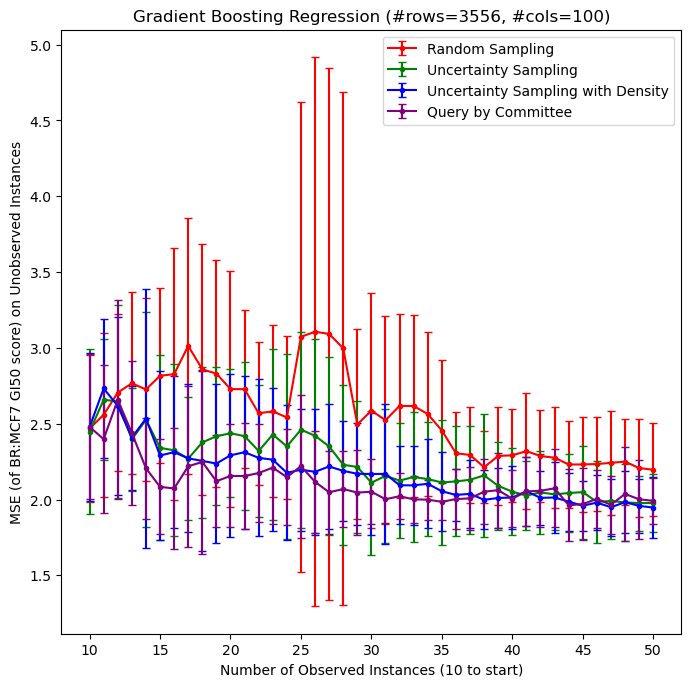

In [14]:
plt.figure(figsize=(8, 8), dpi=100)
for info_dict in [random_info_dictGBR, uncertainty_info_dictGBR, uncertainty_with_density_info_dictGBR, QBC_info_dictGBR]:
    output_dicts = info_dict["output_dicts"]
    all_unobserved_accs = np.array([d["unobserved_MSEs"] for d in output_dicts])
    mean_unobserved_accs = np.mean(all_unobserved_accs, axis=0)
    std_unobserved_accs = np.std(all_unobserved_accs, axis=0)

    n_rounds = mean_unobserved_accs.shape[0]

    round_numbers = np.array(range(n_rounds)) + N_START_OBSERVATIONS

    plt.errorbar(
        round_numbers, 
        mean_unobserved_accs,
        yerr=std_unobserved_accs,
        c=info_dict["color"],
        capsize=3,
        linestyle="-",
        marker=".",
        label=info_dict["simulation_type"]
    )
# plt.ylim((0.01, 0.05))
plt.legend(loc="upper right")
plt.xlabel("Number of Observed Instances ({} to start)".format(N_START_OBSERVATIONS))
plt.ylabel("MSE (of {} GI50 score) on Unobserved Instances".format(output_column_name))
plt.title("Gradient Boosting Regression (#rows={}, #cols={})".format(reducedX.shape[0], reducedX.shape[1]))
plt.show()

In [26]:
'''
Run support vector regression simulation 10 times for each simulation type, and store the results.
'''
# Convenience to avoid having to specify parameters to the ActiveLearningSimulation constructor which will generally be the same every time here.
# Support Vector Regression Helper
class ActiveLearningSimulationHelperSVR(ActiveLearningSimulation):
    def __init__(self, X, y, query_selector):
        super().__init__(
            X,
            y,
            n_start_observations=N_START_OBSERVATIONS,
            observed_set_size_limit=OBSERVATIONS_LIMIT,
            base_learner_class=sklearn.svm.SVR,
            query_selector=query_selector)

print("Starting simulations.")

random_query_selector = RandomQuerySelector()
random_simulation = ActiveLearningSimulationHelperSVR(X, y, random_query_selector)
random_output_dictsSVR = random_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Random simulation.")

uncertainty_query_selector = UncertaintySamplingQuerySelector()
uncertainty_simulation = ActiveLearningSimulationHelperSVR(X, y, uncertainty_query_selector)
uncertainty_output_dictsSVR = uncertainty_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling simulation.")

uncertainty_with_density_query_selector = UncertaintySamplingWithDensityQuerySelector()
uncertainty_with_density_simulation = ActiveLearningSimulationHelperSVR(X, y, uncertainty_with_density_query_selector)
uncertainty_with_density_output_dictsSVR = uncertainty_with_density_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling With Density simulation.")

QBC_query_selector = QueryByCommitteeQuerySelector(BASE_LEARNER_CLASS_SVR, bootstrap_sample_size_multiplier=1, bootstrap_model_count=10)
QBC_simulation = ActiveLearningSimulationHelperSVR(X, y, QBC_query_selector)
QBC_output_dictsSVR = QBC_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Query By Committee simulation.")


Starting simulations.
Completed Random simulation.
Completed Uncertainty Sampling simulation.
Completed Uncertainty Sampling With Density simulation.
Completed Query By Committee simulation.


In [27]:
'''
Generate plot from the simulation results just obtained.
'''

random_info_dictSVR = {
    "simulation_type": "Random Sampling",
    "output_dicts": random_output_dictsSVR,
    "color": "red"
}
uncertainty_info_dictSVR = {
    "simulation_type": "Uncertainty Sampling",
    "output_dicts": uncertainty_output_dictsSVR,
    "color": "green"
}
uncertainty_with_density_info_dictSVR = {
    "simulation_type": "Uncertainty Sampling with Density",
    "output_dicts": uncertainty_with_density_output_dictsSVR,
    "color": "blue"
}
QBC_info_dictSVR = {
    "simulation_type": "Query by Committee",
    "output_dicts": QBC_output_dictsSVR,
    "color": "purple"
}

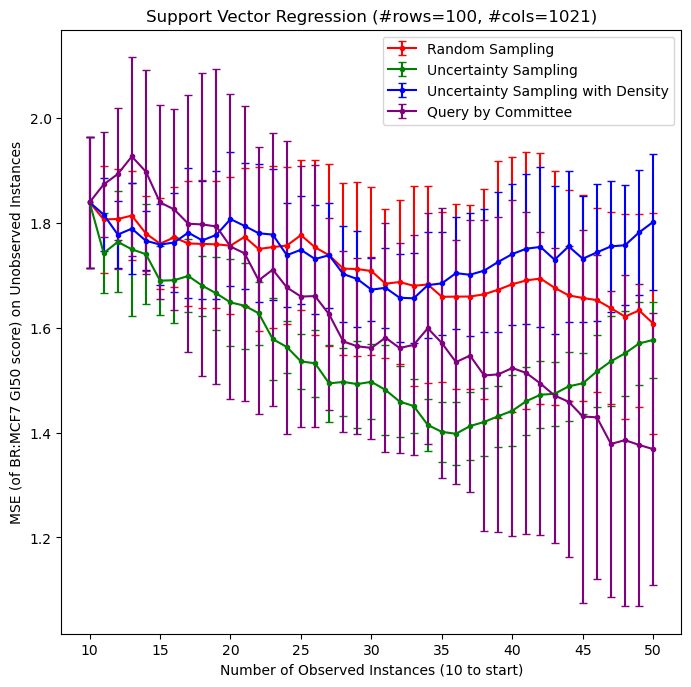

In [28]:
plt.figure(figsize=(8, 8), dpi=100)
for info_dict in [random_info_dictSVR, uncertainty_info_dictSVR, uncertainty_with_density_info_dictSVR, QBC_info_dictSVR]:
    output_dicts = info_dict["output_dicts"]
    all_unobserved_accs = np.array([d["unobserved_MSEs"] for d in output_dicts])
    mean_unobserved_accs = np.mean(all_unobserved_accs, axis=0)
    std_unobserved_accs = np.std(all_unobserved_accs, axis=0)

    n_rounds = mean_unobserved_accs.shape[0]

    round_numbers = np.array(range(n_rounds)) + N_START_OBSERVATIONS

    plt.errorbar(
        round_numbers, 
        mean_unobserved_accs,
        yerr=std_unobserved_accs,
        c=info_dict["color"],
        capsize=3,
        linestyle="-",
        marker=".",
        label=info_dict["simulation_type"]
    )
# plt.ylim((0.01, 0.05))
plt.legend(loc="upper right")
plt.xlabel("Number of Observed Instances ({} to start)".format(N_START_OBSERVATIONS))
plt.ylabel("MSE (of {} GI50 score) on Unobserved Instances".format(output_column_name))
plt.title("Support Vector Regression (#rows={}, #cols={})".format(X.shape[0], X.shape[1]))
plt.show()

In [11]:
'''
Run multi-layer perceptron regression simulation 10 times for each simulation type, and store the results.
'''
# Convenience to avoid having to specify parameters to the ActiveLearningSimulation constructor which will generally be the same every time here.
# MLP Regression Helper
class ActiveLearningSimulationHelperMLPR(NeuralLearningSimulation):
    def __init__(self, X, y, query_selector):
        super().__init__(
            X,
            y,
            n_start_observations=N_START_OBSERVATIONS,
            observed_set_size_limit=OBSERVATIONS_LIMIT,
            base_learner_class= sklearn.neural_network.MLPRegressor,
            query_selector=query_selector)

print("Starting simulations.")

random_query_selector = RandomQuerySelector()
random_simulation = ActiveLearningSimulationHelperMLPR(selectX, y, random_query_selector)
random_output_dictsMLPR = random_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Random simulation.")

uncertainty_query_selector = UncertaintySamplingQuerySelector()
uncertainty_simulation = ActiveLearningSimulationHelperMLPR(selectX, y, uncertainty_query_selector)
uncertainty_output_dictsMLPR = uncertainty_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling simulation.")

uncertainty_with_density_query_selector = UncertaintySamplingWithDensityQuerySelector(pairwise_distances)
uncertainty_with_density_simulation = ActiveLearningSimulationHelperMLPR(selectX, y, uncertainty_with_density_query_selector)
uncertainty_with_density_output_dictsMLPR = uncertainty_with_density_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling With Density simulation.")

QBC_query_selector = QueryByCommitteeQuerySelector(BASE_LEARNER_CLASS_MLPR, bootstrap_sample_size_multiplier=1, bootstrap_model_count=10)
QBC_simulation = ActiveLearningSimulationHelperMLPR(selectX, y, QBC_query_selector)
QBC_output_dictsMLPR = QBC_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Query By Committee simulation.")


Starting simulations.
Completed Random simulation.
Completed Uncertainty Sampling simulation.
Completed Uncertainty Sampling With Density simulation.
Completed Query By Committee simulation.


In [12]:
'''
Generate plot from the simulation results just obtained.
'''

random_info_dictMLPR = {
    "simulation_type": "Random Sampling",
    "output_dicts": random_output_dictsMLPR,
    "color": "red"
}
uncertainty_info_dictMLPR = {
    "simulation_type": "Uncertainty Sampling",
    "output_dicts": uncertainty_output_dictsMLPR,
    "color": "green"
}
uncertainty_with_density_info_dictMLPR = {
    "simulation_type": "Uncertainty Sampling with Density",
    "output_dicts": uncertainty_with_density_output_dictsMLPR,
    "color": "blue"
}
QBC_info_dictMLPR = {
    "simulation_type": "Query by Committee",
    "output_dicts": QBC_output_dictsMLPR,
    "color": "purple"
}

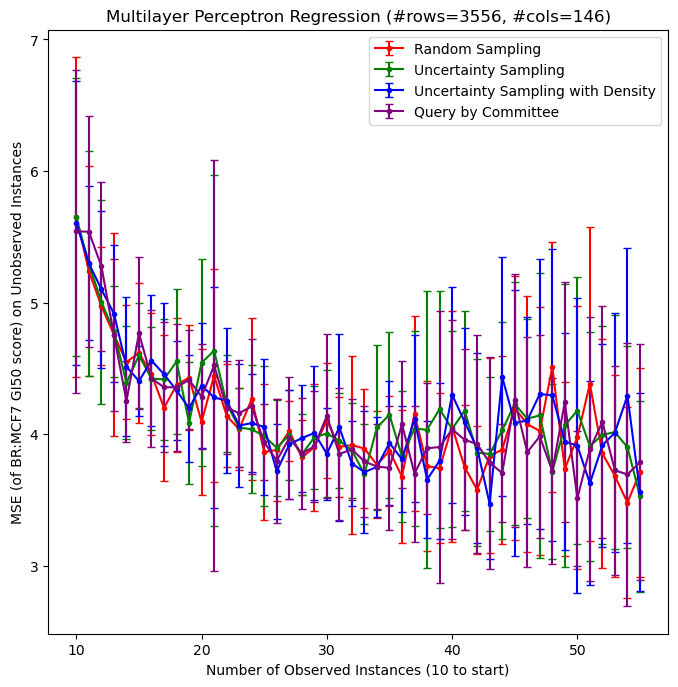

In [13]:
plt.figure(figsize=(8, 8), dpi=100)
for info_dict in [random_info_dictMLPR, uncertainty_info_dictMLPR, uncertainty_with_density_info_dictMLPR, QBC_info_dictMLPR]:
    output_dicts = info_dict["output_dicts"]
    all_unobserved_accs = np.array([d["unobserved_MSEs"] for d in output_dicts])
    mean_unobserved_accs = np.mean(all_unobserved_accs, axis=0)
    std_unobserved_accs = np.std(all_unobserved_accs, axis=0)

    n_rounds = mean_unobserved_accs.shape[0]

    round_numbers = np.array(range(n_rounds)) + N_START_OBSERVATIONS

    plt.errorbar(
        round_numbers, 
        mean_unobserved_accs,
        yerr=std_unobserved_accs,
        c=info_dict["color"],
        capsize=3,
        linestyle="-",
        marker=".",
        label=info_dict["simulation_type"]
    )
# plt.ylim((0.01, 0.05))
plt.legend(loc="upper right")
plt.xlabel("Number of Observed Instances ({} to start)".format(N_START_OBSERVATIONS))
plt.ylabel("MSE (of {} GI50 score) on Unobserved Instances".format(output_column_name))
plt.title("Multilayer Perceptron Regression (#rows={}, #cols={})".format(selectX.shape[0], selectX.shape[1]))
plt.show()

In [15]:
'''
Run Random Forest regression simulation 10 times for each simulation type, and store the results.
'''
# Convenience to avoid having to specify parameters to the ActiveLearningSimulation constructor which will generally be the same every time here.
# Random Forest Regression Helper
class ActiveLearningSimulationHelperRFR(ActiveLearningSimulation):
    def __init__(self, X, y, query_selector):
        super().__init__(
            X,
            y,
            n_start_observations=N_START_OBSERVATIONS,
            observed_set_size_limit=OBSERVATIONS_LIMIT,
            base_learner_class=sklearn.ensemble.RandomForestRegressor,
            query_selector=query_selector)

print("Starting simulations.")

random_query_selector = RandomQuerySelector()
random_simulation = ActiveLearningSimulationHelperRFR(reducedX, y, random_query_selector)
random_output_dictsRFR = random_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Random simulation.")

uncertainty_query_selector = UncertaintySamplingQuerySelector()
uncertainty_simulation = ActiveLearningSimulationHelperRFR(reducedX, y, uncertainty_query_selector)
uncertainty_output_dictsRFR = uncertainty_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling simulation.")

uncertainty_with_density_query_selector = UncertaintySamplingWithDensityQuerySelector(pairwise_distances)
uncertainty_with_density_simulation = ActiveLearningSimulationHelperRFR(reducedX, y, uncertainty_with_density_query_selector)
uncertainty_with_density_output_dictsRFR = uncertainty_with_density_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Uncertainty Sampling With Density simulation.")

QBC_query_selector = QueryByCommitteeQuerySelector(BASE_LEARNER_CLASS_RFR, bootstrap_sample_size_multiplier=1, bootstrap_model_count=10)
QBC_simulation = ActiveLearningSimulationHelperRFR(reducedX, y, QBC_query_selector)
QBC_output_dictsRFR = QBC_simulation.run_with_random_seeds(AL_RANDOM_SEEDS)
print("Completed Query By Committee simulation.")


Starting simulations.
Completed Random simulation.
Completed Uncertainty Sampling simulation.
Completed Uncertainty Sampling With Density simulation.
Completed Query By Committee simulation.


In [16]:
'''
Generate plot from the simulation results just obtained.
'''

random_info_dictRFR = {
    "simulation_type": "Random Sampling",
    "output_dicts": random_output_dictsRFR,
    "color": "red"
}
uncertainty_info_dictRFR = {
    "simulation_type": "Uncertainty Sampling",
    "output_dicts": uncertainty_output_dictsRFR,
    "color": "green"
}
uncertainty_with_density_info_dictRFR = {
    "simulation_type": "Uncertainty Sampling with Density",
    "output_dicts": uncertainty_with_density_output_dictsRFR,
    "color": "blue"
}
QBC_info_dictRFR = {
    "simulation_type": "Query by Committee",
    "output_dicts": QBC_output_dictsRFR,
    "color": "purple"
}

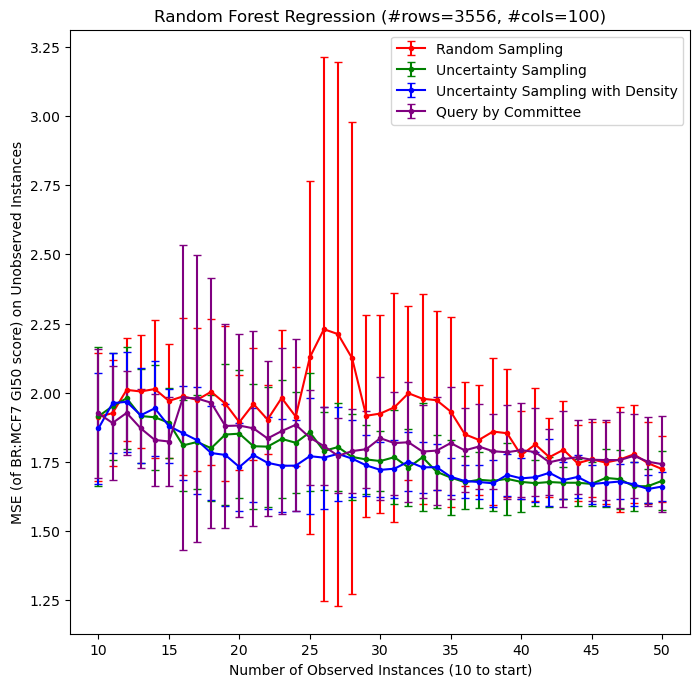

In [17]:
plt.figure(figsize=(8, 8), dpi=100)
for info_dict in [random_info_dictRFR, uncertainty_info_dictRFR, uncertainty_with_density_info_dictRFR, QBC_info_dictRFR]:
    output_dicts = info_dict["output_dicts"]
    all_unobserved_accs = np.array([d["unobserved_MSEs"] for d in output_dicts])
    mean_unobserved_accs = np.mean(all_unobserved_accs, axis=0)
    std_unobserved_accs = np.std(all_unobserved_accs, axis=0)

    n_rounds = mean_unobserved_accs.shape[0]

    round_numbers = np.array(range(n_rounds)) + N_START_OBSERVATIONS

    plt.errorbar(
        round_numbers, 
        mean_unobserved_accs,
        yerr=std_unobserved_accs,
        c=info_dict["color"],
        capsize=3,
        linestyle="-",
        marker=".",
        label=info_dict["simulation_type"]
    )
# plt.ylim((0.01, 0.05))
plt.legend(loc="upper right")
plt.xlabel("Number of Observed Instances ({} to start)".format(N_START_OBSERVATIONS))
plt.ylabel("MSE (of {} GI50 score) on Unobserved Instances".format(output_column_name))
plt.title("Random Forest Regression (#rows={}, #cols={})".format(reducedX.shape[0], reducedX.shape[1]))
plt.show()